In [1]:
import requests
def encrypt():
    url = "http://aes.cryptohack.org/bean_counter/encrypt/"
    rsp = requests.get(url)
    return rsp.json()['encrypted']

png_hdr = bytes([0x89, 0x50, 0x4e, 0x47, 0x0d, 0x0a, 0x1a, 0x0a, 0x00, 0x00, 0x00, 0x0d, 0x49, 0x48, 0x44, 0x52])
encrypted = bytes.fromhex(encrypt())

keystream = []
for i in range(len(png_hdr)):
    keystream.append(png_hdr[i] ^ encrypted[i])

print(keystream)

png = [0]*len(encrypted)
for i in range(len(encrypted)):
    png[i] = encrypted[i] ^ keystream[i%len(keystream)]

with open('bean_counter.png', 'wb') as fd:
    fd.write(bytes(png))

[199, 230, 118, 12, 218, 168, 88, 114, 74, 35, 18, 164, 33, 159, 190, 170]


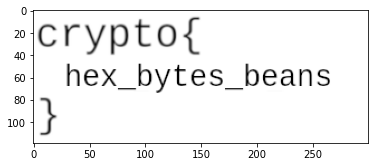

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('bean_counter.png')
imgplot = plt.imshow(img)
plt.show()